### 추천서비스 로직 만들기

(임시)


일단 데이터 프레임으로 존재한다면.  데이터가 완성되기 전까지 

주식의 종가 = 암호화폐 종가

주식의 거례량 = SNS 감정지수

(각코인별)



날짜 - 시세, 감정지수()

### 구상 지표 만들기
- 필요 정보
날짜별 - 시세, 감정지수()

- 추천기준이되는 정보

개인의 투자 기간 n = 예)1주/1달/3달/6달  <--- 주식과 달리 7일,   n= 7,30,90,180

주기는 2*n 로 평균이동선 측정. 왜냐면 저점에서 고점에 판다라고 생각(주기의 반)  그누구도 고점에사서 고점에 팔지 않기 때문

함수가 필요한 평균이동선 = 2*n

**감정지수 마찬가지

- 결국 이동평균선에 따라 z밸류를 각각 구하고 그 평균을 저장


### 구상-지표로 분류 순번 지정
z밸류를 제곱하여 기간에 의해 평균을 낸다. 

- 어느범위의 값들을 제곱루트평균낼지 지정 
- 이 값들을 새로운 하나의 테이블로 구성시킨다.
- 순위에따라 가상의 점수를 붙인다.

### 구상-순번 지정값에 의거해서 추천 로직, 아웃풋 까지

- 순위에따라 가상의 점수를 부여받은 것을 추천로직의 인풋에따라 다시 비중을 곱한다.
- 그래서 최고의 점수를 갖는 암호화패(주식을) 분류 할수 있다.
- 그리고 그 것을 아웃풋한다.

## I. 패키지 밎 자료 불러오기

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

### 1) 나중에 데이터베이스 커리해서 가져오기

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/C.csv'

-rw------- 1 root root 165058 Nov  8 06:32 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/C.csv'


In [120]:
AAPL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/AAPL.csv')
BABA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/BABA.csv',encoding='cp949')
C = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/C.csv', encoding='cp949')
INTC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/INTC.csv', encoding='cp949')
MSFT = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/MSFT.csv')
# TSLA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/TSLA.csv')
UGL = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/UGL.csv', encoding='cp949')
WFC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/WFC.csv', encoding='cp949')

In [121]:
AAPL.head()

,일자,시가,고가,저가,종가,BB_상한선,거래량
0,20211105,151.890,152.20,150.06,151.28,155.3499,"65,463,883"
1,20211104,151.580,152.43,150.64,150.96,155.2323,"60,394,616"
2,20211103,150.390,151.97,149.82,151.49,155.1252,"54,511,534"
3,20211102,148.660,151.57,148.65,150.02,154.9967,"69,121,987"
4,20211101,148.985,149.70,147.80,148.96,154.9146,"74,588,258"


### 2) 변수 정의

In [122]:
#n = 개인의 1회 투자 기간
#stocks = 주식(암호화폐)의 종류
#bounds = 참조해야할 범위 <- 질문: 최근 몃달(혹은년) 범위의 통계를 보시겠습니까?
n = [7,30,90,180]
stocks = [AAPL,BABA,C,INTC,MSFT,UGL,WFC]
stocks_name = ['AAPL','BABA','C','INTC','MSFT','UGL','WFC']
bounds = [7,30,180,360,720]

## II. 이동평균선 작업

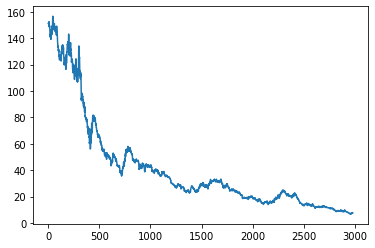

In [123]:
plt.plot(AAPL['종가'])
plt.show()

#그래프는 우리가 보는거에 좌우 반전이나 현 시점에서 그렇게 중요하지 않음

### 1) 이동평균선 코드 만들기

In [124]:
# AAPL['이동평균7일']= AAPL['종가'].rolling(window=7).mean().shift(-6)
#shift없이 사용하면 위로 부터 아래로 더해 7일차 아래옆에 값이 사용되 다시 7일 위로 올려주어야 한다.

# AAPL.head(10)

In [125]:
# AAPL.tail(10)

### 2) 모든 n에 대하여

In [126]:
# for i in n :
#   AAPL['이동평균{0}일'.format(i)]= AAPL['종가'].rolling(window=i).mean().shift(-(i-1))

In [127]:
# AAPL
# 검산 완료

### 3) 모든 주식에 대하여

In [128]:
for j in stocks :
  for i in n:
    j['이동평균{0}일'.format(i)]= j['종가'].rolling(window=i).mean().shift(-(i-1))

In [129]:
# # 일단 수작업으로 진행(나중에 알아보기)
# # stocks = ['AAPL','BABA','C','INTC','MSFT','TSLA','UGL','WFC']
# for i in n :
#   AAPL['이동평균{0}일'.format(i)]= AAPL['종가'].rolling(window=i).mean().shift(-(i-1))
# for i in n :
#   BABA['이동평균{0}일'.format(i)]= BABA['종가'].rolling(window=i).mean().shift(-(i-1))
# for i in n :
#   C['이동평균{0}일'.format(i)]= C['종가'].rolling(window=i).mean().shift(-(i-1))  
# for i in n :
#   INTC['이동평균{0}일'.format(i)]= INTC['종가'].rolling(window=i).mean().shift(-(i-1))
# for i in n :
#   MSFT['이동평균{0}일'.format(i)]= MSFT['종가'].rolling(window=i).mean().shift(-(i-1))
# # for i in n :
#   # TSLA['이동평균{0}일'.format(i)]= TSLA['종가'].rolling(window=i).mean().shift(-(i-1))
# for i in n :
#   UGL['이동평균{0}일'.format(i)]= UGL['종가'].rolling(window=i).mean().shift(-(i-1))
# for i in n :
#   WFC['이동평균{0}일'.format(i)]= WFC['종가'].rolling(window=i).mean().shift(-(i-1))


In [130]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   일자        2983 non-null   int64  
 1   시가        2983 non-null   float64
 2   고가        2983 non-null   float64
 3   저가        2983 non-null   float64
 4   종가        2983 non-null   float64
 5   BB_상한선    2919 non-null   float64
 6   거래량       2983 non-null   object 
 7   이동평균7일    2977 non-null   float64
 8   이동평균30일   2954 non-null   float64
 9   이동평균90일   2894 non-null   float64
 10  이동평균180일  2804 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 256.5+ KB


## III.표준편차,Z밸류 작업

### 1)표준편차, z밸류 코드 만들기

In [131]:
# AAPL['이동평균7일표준편차']= AAPL['종가'].rolling(window=7).std().shift(-6)

In [132]:
# AAPL.head(8)
# 검산 완료

In [133]:
# AAPL['이동평균7일z밸류'] = (AAPL['종가']-AAPL['이동평균7일'])/(AAPL['이동평균7일표준편차'])

In [134]:
# AAPL.head()

### 2) 모든 n에 대하여

In [135]:
# for i in n :
#   AAPL['이동평균{0}일표준편차'.format(i)]= AAPL['종가'].rolling(window=i).std().shift(-(i-1))
# for i in n :
#   AAPL['이동평균{0}일z밸류'.format(i)] = (AAPL['종가']-AAPL['이동평균{0}일'.format(i)])/(AAPL['이동평균{0}일표준편차'.format(i)])

In [136]:
# AAPL.head()
# 검산 완료

### 3) 모든 주식에 대하여

In [137]:
for j in stocks:
  for i in n :
    j['이동평균{0}일표준편차'.format(i)]= j['종가'].rolling(window=i).std().shift(-(i-1))
  for i in n :
    j['이동평균{0}일z밸류'.format(i)] = (j['종가']-j['이동평균{0}일'.format(i)])/(j['이동평균{0}일표준편차'.format(i)])

In [138]:
BABA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   일자            1798 non-null   int64  
 1   시가            1798 non-null   float64
 2   고가            1798 non-null   float64
 3   저가            1798 non-null   float64
 4   종가            1798 non-null   float64
 5   BB_상한선        1734 non-null   float64
 6   거래량           1798 non-null   object 
 7   이동평균7일        1792 non-null   float64
 8   이동평균30일       1769 non-null   float64
 9   이동평균90일       1709 non-null   float64
 10  이동평균180일      1619 non-null   float64
 11  이동평균7일표준편차    1792 non-null   float64
 12  이동평균30일표준편차   1769 non-null   float64
 13  이동평균90일표준편차   1709 non-null   float64
 14  이동평균180일표준편차  1619 non-null   float64
 15  이동평균7일z밸류     1792 non-null   float64
 16  이동평균30일z밸류    1769 non-null   float64
 17  이동평균90일z밸류    1709 non-null   float64
 18  이동평균180일z밸류   1619 non-null 

## IV. 지표로 분류 순번 지정

z밸류를 제곱하여 기간에 의해 평균을 낸다. 

- 어느범위의 값들을 제곱루트평균낼지 지정 
- 이 값들을 새로운 하나의 테이블로 구성시킨다.
- 순위에따라 가상의 점수를 붙인다.

In [139]:
#n = 개인의 1회 투자 기간
#stocks = 주식(암호화폐)의 종류
#bounds = 참조해야할 범위 <- 질문: 최근 몃달(혹은년) 범위의 통계를 보시겠습니까?
n = [7,30,90,180]
stocks = [AAPL,BABA,C,INTC,MSFT,UGL,WFC]
stocks_name = ['AAPL','BABA','C','INTC','MSFT','UGL','WFC']
bounds = [7,30,180,360,720]

### 1) 기본코드 만들기 - 제곱값

기본,n,모든 주식

In [140]:
AAPL.head()

,일자,시가,고가,저가,종가,BB_상한선,거래량,이동평균7일,이동평균30일,이동평균90일,이동평균180일,이동평균7일표준편차,이동평균30일표준편차,이동평균90일표준편차,이동평균180일표준편차,이동평균7일z밸류,이동평균30일z밸류,이동평균90일z밸류,이동평균180일z밸류
0,20211105,151.890,152.20,150.06,151.28,155.3499,"65,463,883",150.725714,146.038667,147.020222,137.173056,1.212461,3.957928,3.731835,10.788351,0.457158,1.324262,1.141470,1.307609
1,20211104,151.580,152.43,150.64,150.96,155.2323,"60,394,616",150.378571,145.893333,146.861111,137.032611,1.365521,3.837034,3.851530,10.768210,0.425792,1.320464,1.064224,1.293380
2,20211103,150.390,151.97,149.82,151.49,155.1252,"54,511,534",150.144286,145.755667,146.698556,136.915444,1.389615,3.721326,3.983077,10.730494,0.968408,1.540938,1.202951,1.358237
3,20211102,148.660,151.57,148.65,150.02,154.9967,"69,121,987",149.737143,145.567667,146.512889,136.794444,1.346461,3.560636,4.143450,10.687943,0.210075,1.250432,0.846423,1.237428
4,20211101,148.985,149.70,147.80,148.96,154.9146,"74,588,258",149.547143,145.348000,146.325000,136.687889,1.392931,3.478825,4.360353,10.650897,-0.421516,1.038282,0.604309,1.152214


In [141]:
for j in stocks:
  for i in n :
    j['이동평균{0}일z밸류제곱'.format(i)] = j['이동평균{0}일z밸류'.format(i)]**2

In [142]:
AAPL.head()

,일자,시가,고가,저가,종가,BB_상한선,거래량,이동평균7일,이동평균30일,이동평균90일,이동평균180일,이동평균7일표준편차,이동평균30일표준편차,이동평균90일표준편차,이동평균180일표준편차,이동평균7일z밸류,이동평균30일z밸류,이동평균90일z밸류,이동평균180일z밸류,이동평균7일z밸류제곱,이동평균30일z밸류제곱,이동평균90일z밸류제곱,이동평균180일z밸류제곱
0,20211105,151.890,152.20,150.06,151.28,155.3499,"65,463,883",150.725714,146.038667,147.020222,137.173056,1.212461,3.957928,3.731835,10.788351,0.457158,1.324262,1.141470,1.307609,0.208993,1.753670,1.302954,1.709841
1,20211104,151.580,152.43,150.64,150.96,155.2323,"60,394,616",150.378571,145.893333,146.861111,137.032611,1.365521,3.837034,3.851530,10.768210,0.425792,1.320464,1.064224,1.293380,0.181299,1.743626,1.132572,1.672832
2,20211103,150.390,151.97,149.82,151.49,155.1252,"54,511,534",150.144286,145.755667,146.698556,136.915444,1.389615,3.721326,3.983077,10.730494,0.968408,1.540938,1.202951,1.358237,0.937815,2.374491,1.447090,1.844808
3,20211102,148.660,151.57,148.65,150.02,154.9967,"69,121,987",149.737143,145.567667,146.512889,136.794444,1.346461,3.560636,4.143450,10.687943,0.210075,1.250432,0.846423,1.237428,0.044131,1.563580,0.716432,1.531227
4,20211101,148.985,149.70,147.80,148.96,154.9146,"74,588,258",149.547143,145.348000,146.325000,136.687889,1.392931,3.478825,4.360353,10.650897,-0.421516,1.038282,0.604309,1.152214,0.177676,1.078029,0.365189,1.327597


### 2) bounds 기준 평균내기

In [143]:
# DF['7일기준데이터'] = AAPL['이동평균7일z밸류제곱'].rolling(window=4).mean().shift(-1) 
DF1 = np.sqrt(AAPL['이동평균7일z밸류제곱'][0:3].mean())

In [144]:
DF1
#검산완료

0.6653587792551903

In [145]:
DF1 = np.sqrt(AAPL['이동평균7일z밸류제곱'][0:30].mean())
DF1

1.0100241025545762

In [146]:
DF1 = dict()
DF1['AAPL;MA7'] = np.sqrt(AAPL['이동평균7일z밸류제곱'][0:7].mean())

In [147]:
DF1

{'AAPL;MA7': 0.9576343635385198}

### 3) 모든 bounds 에 관하여
* key,value 로 저장하기

In [148]:
DF1 = dict()
for i in bounds:
  DF1['AAPL;MA7;bounds{0}'.format(i)] = np.sqrt(AAPL['이동평균7일z밸류제곱'][0:i].mean())

In [149]:
DF1

{'AAPL;MA7;bounds180': 1.0648968163940704,
 'AAPL;MA7;bounds30': 1.0100241025545762,
 'AAPL;MA7;bounds360': 1.1009314872796157,
 'AAPL;MA7;bounds7': 0.9576343635385198,
 'AAPL;MA7;bounds720': 1.1112894541512026}

### 4)모든 n, 주식에 대해

In [159]:
DF_AAPL = dict()
for j in n:
  for i in bounds:
      DF_AAPL['AAPL;MA{1};bounds{0}'.format(i,j)] = np.sqrt(AAPL['이동평균{0}일z밸류제곱'.format(j)][0:i].mean())

In [160]:
DF_AAPL

{'AAPL;MA180;bounds180': 1.3293886940189088,
 'AAPL;MA180;bounds30': 1.0143585957869106,
 'AAPL;MA180;bounds360': 1.5968780244919631,
 'AAPL;MA180;bounds7': 1.305986909172706,
 'AAPL;MA180;bounds720': 1.5395839717650384,
 'AAPL;MA30;bounds180': 1.4169142757897328,
 'AAPL;MA30;bounds30': 1.3145033802299453,
 'AAPL;MA30;bounds360': 1.3891206119996986,
 'AAPL;MA30;bounds7': 1.4875067168791805,
 'AAPL;MA30;bounds720': 1.4423030173921283,
 'AAPL;MA7;bounds180': 1.0648968163940704,
 'AAPL;MA7;bounds30': 1.0100241025545762,
 'AAPL;MA7;bounds360': 1.1009314872796157,
 'AAPL;MA7;bounds7': 0.9576343635385198,
 'AAPL;MA7;bounds720': 1.1112894541512026,
 'AAPL;MA90;bounds180': 1.1687197929653488,
 'AAPL;MA90;bounds30': 0.6261752174617847,
 'AAPL;MA90;bounds360': 1.3619034815613607,
 'AAPL;MA90;bounds7': 1.0387223446585108,
 'AAPL;MA90;bounds720': 1.392185881064238}

In [161]:
DF = dict()
for l,k in zip(stocks_name,stocks):
  for j in n:
    for i in bounds:
       DF['{2};MA{1};bounds{0}'.format(i,j,l)] = np.sqrt(k['이동평균{0}일z밸류제곱'.format(j)][0:i].mean())

In [162]:
DF

{'AAPL;MA180;bounds180': 1.3293886940189088,
 'AAPL;MA180;bounds30': 1.0143585957869106,
 'AAPL;MA180;bounds360': 1.5968780244919631,
 'AAPL;MA180;bounds7': 1.305986909172706,
 'AAPL;MA180;bounds720': 1.5395839717650384,
 'AAPL;MA30;bounds180': 1.4169142757897328,
 'AAPL;MA30;bounds30': 1.3145033802299453,
 'AAPL;MA30;bounds360': 1.3891206119996986,
 'AAPL;MA30;bounds7': 1.4875067168791805,
 'AAPL;MA30;bounds720': 1.4423030173921283,
 'AAPL;MA7;bounds180': 1.0648968163940704,
 'AAPL;MA7;bounds30': 1.0100241025545762,
 'AAPL;MA7;bounds360': 1.1009314872796157,
 'AAPL;MA7;bounds7': 0.9576343635385198,
 'AAPL;MA7;bounds720': 1.1112894541512026,
 'AAPL;MA90;bounds180': 1.1687197929653488,
 'AAPL;MA90;bounds30': 0.6261752174617847,
 'AAPL;MA90;bounds360': 1.3619034815613607,
 'AAPL;MA90;bounds7': 1.0387223446585108,
 'AAPL;MA90;bounds720': 1.392185881064238,
 'BABA;MA180;bounds180': 1.6102717441260095,
 'BABA;MA180;bounds30': 1.5372783026627161,
 'BABA;MA180;bounds360': 1.626554966875989,
 

### 검산!

In [163]:
DF_WFC = dict()
for j in n:
  for i in bounds:
      DF_WFC['WFC;MA{1};bounds{0}'.format(i,j)] = np.sqrt(WFC['이동평균{0}일z밸류제곱'.format(j)][0:i].mean())

In [164]:
DF_WFC

{'WFC;MA180;bounds180': 1.6194769220283465,
 'WFC;MA180;bounds30': 1.3031900777349221,
 'WFC;MA180;bounds360': 1.4978341341111123,
 'WFC;MA180;bounds7': 1.7456341559658952,
 'WFC;MA180;bounds720': 1.5739513121789699,
 'WFC;MA30;bounds180': 1.373679153434037,
 'WFC;MA30;bounds30': 1.370965883812696,
 'WFC;MA30;bounds360': 1.3351226069363786,
 'WFC;MA30;bounds7': 1.4959112108717554,
 'WFC;MA30;bounds720': 1.3493811718198814,
 'WFC;MA7;bounds180': 1.1165743886674333,
 'WFC;MA7;bounds30': 1.137144458121965,
 'WFC;MA7;bounds360': 1.1358698008009676,
 'WFC;MA7;bounds7': 1.2797791467085966,
 'WFC;MA7;bounds720': 1.1291182603942518,
 'WFC;MA90;bounds180': 1.3915045302351168,
 'WFC;MA90;bounds30': 1.3931942570941422,
 'WFC;MA90;bounds360': 1.4306127188329094,
 'WFC;MA90;bounds7': 1.8716589975033837,
 'WFC;MA90;bounds720': 1.4583288471675826}

In [156]:
#   AAPL['이동평균{0}일표준편차'.format(i)]= AAPL['종가'].rolling(window=i).std().shift(-(i-1))